In [101]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [102]:
trees = pd.read_csv('TreeCensus.csv')

In [103]:
trees

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


In [104]:
## Remove unnecessary columns
##trees.columns
trees_subset = trees[['tree_id', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'steward',
       'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'latitude', 'longitude', 'borough', 'borocode']]

In [105]:
trees_subset.isnull().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
latitude          0
longitude         0
borough           0
borocode          0
dtype: int64

In [106]:
## Looking at NA health values
na_trees = trees_subset[(trees_subset['health'].isna())]
na_trees
## Looks like status is either dead or stump when health = NaN

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,borough,borocode
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.774993,-73.922037,Queens,4
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.871927,-73.882349,Bronx,2
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.705742,-73.917849,Brooklyn,3
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.559061,-74.106038,Staten Island,5
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.772483,-73.909073,Queens,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.785136,-73.951108,Manhattan,1
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.647154,-73.955619,Brooklyn,3
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.528544,-74.165246,Staten Island,5
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.590385,-73.972892,Brooklyn,3


In [107]:
## Looking to see if NaN values from other columns match when health is NaN
notnahealth = trees_subset[(trees_subset['health'].notna())]
notnahealth.isnull().sum()
## This means almost all NaN values are when status != alive

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         0
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
latitude       0
longitude      0
borough        0
borocode       0
dtype: int64

In [108]:
## Replacing NaN values when status is dead or stump
mask = ((trees_subset['status'] == 'Dead') | (trees_subset['status'] == 'Stump'))
trees_subset.loc[mask]
 

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,borough,borocode
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.774993,-73.922037,Queens,4
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.871927,-73.882349,Bronx,2
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.705742,-73.917849,Brooklyn,3
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.559061,-74.106038,Staten Island,5
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.772483,-73.909073,Queens,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.785136,-73.951108,Manhattan,1
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.647154,-73.955619,Brooklyn,3
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.528544,-74.165246,Staten Island,5
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,40.590385,-73.972892,Brooklyn,3


In [109]:
## Replacing nulls with NA when status != alive
mask = ((trees_subset['status'] == 'Dead') | (trees_subset['status'] == 'Stump'))
trees_subset.loc[mask] = trees_subset.loc[mask].fillna('NA')
trees_subset.isnull().sum()


C:\Users\Neil MacLellan\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
latitude       0
longitude      0
borough        0
borocode       0
dtype: int64

In [110]:
trees_subset['status'].value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [111]:
## Replacing remaining nulls with most common answer from each column
max_health = trees_subset['health'].mode()[0]
max_spc_latin = trees_subset['spc_latin'].mode()[0]
max_sidewalk = trees_subset['sidewalk'].mode()[0]
max_problems = trees_subset['problems'].mode()[0]


In [112]:
trees_subset['health'].fillna(max_health, inplace=True)
trees_subset['spc_latin'].fillna(max_spc_latin, inplace=True)
trees_subset['sidewalk'].fillna(max_sidewalk, inplace=True)
trees_subset['problems'].fillna(max_problems, inplace=True)
trees_subset.isnull().sum()

C:\Users\Neil MacLellan\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
latitude      0
longitude     0
borough       0
borocode      0
dtype: int64

In [113]:
##Taking a look at numerical data
trees_subset.describe()


,tree_id,tree_dbh,stump_diam,latitude,longitude,borocode
count,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463,40.701261,-73.924060,3.358500
std,208122.092902,8.723042,3.290241,0.090311,0.123583,1.166746
min,3.000000,0.000000,0.000000,40.498466,-74.254965,1.000000
25%,186582.750000,4.000000,0.000000,40.631928,-73.980500,3.000000
50%,366214.500000,9.000000,0.000000,40.700612,-73.912911,4.000000
75%,546170.250000,16.000000,0.000000,40.762228,-73.834910,4.000000
max,722694.000000,450.000000,140.000000,40.912918,-73.700488,5.000000


In [114]:
##Lets find out why we have tree_dbh and stump_diam values of 0

trees_subset[(trees_subset['tree_dbh'] == 0)]
## Looks like status is dead or stump when tree_dbh is 0. Probably means tree_dbh is only recorded for alive trees. Might be similar with stumps.



,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,borough,borocode
37,211205,0,16,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.774993,-73.922037,Queens,4
57,187807,0,0,OnCurb,Dead,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.871927,-73.882349,Bronx,2
239,203597,0,15,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.772483,-73.909073,Queens,4
641,179766,0,30,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.637379,-73.953814,Brooklyn,3
644,180619,0,10,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.725300,-73.839376,Queens,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.711246,-73.956418,Brooklyn,3
683686,191219,0,25,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.761032,-73.765688,Queens,4
683695,170888,0,5,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.647154,-73.955619,Brooklyn,3
683697,177922,0,17,OnCurb,Stump,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.528544,-74.165246,Staten Island,5


In [115]:
## Trees with tree_dbh = 0
tree_dbh0 = trees_subset[(trees_subset['tree_dbh'] == 0)]
tree_dbh0['status'].value_counts()
## Looks like our above assumption was incorrect. Most values of 0 are when status is only stump.


Stump    17654
Alive      222
Dead        56
Name: status, dtype: int64

In [116]:
tree_dbh0_alive = tree_dbh0[(tree_dbh0['status'] == 'Alive')]
tree_dbh0[(tree_dbh0['status'] == 'Alive')]
## Looks like keying error, probably going to remove.

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,borough,borocode
5312,38793,0,0,OnCurb,Alive,Good,Cotinus coggygria,3or4,Damage,None,No,No,No,No,No,No,No,No,No,40.657517,-73.981138,Brooklyn,3
30524,204988,0,0,OnCurb,Alive,Good,Quercus phellos,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,40.685329,-73.996793,Brooklyn,3
44772,241329,0,0,OffsetFromCurb,Alive,Good,Malus,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,40.744543,-73.901985,Queens,4
47154,173248,0,0,OnCurb,Alive,Good,Quercus bicolor,None,NoDamage,None,No,No,No,No,No,No,No,No,No,40.706858,-73.951200,Brooklyn,3
47484,204173,0,0,OnCurb,Alive,Poor,Picea abies,None,NoDamage,None,No,No,No,No,No,No,No,No,No,40.567325,-74.135129,Staten Island,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658977,162280,0,0,OnCurb,Alive,Poor,Quercus bicolor,None,Damage,None,No,No,No,No,No,No,No,No,No,40.584406,-74.093527,Staten Island,5
671073,17796,0,0,OnCurb,Alive,Fair,Taxodium distichum,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No,40.853305,-73.930676,Manhattan,1
671971,120612,0,0,OnCurb,Alive,Good,Juniperus virginiana,None,NoDamage,None,No,No,No,No,No,No,No,No,No,40.790040,-73.842695,Queens,4
672443,116239,0,0,OnCurb,Alive,Good,Acer palmatum,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,40.883956,-73.904855,Bronx,2


In [117]:
## Let's look at statistics for only alive and dead trees. 
notstump = trees_subset[(trees_subset['status'] != 'Stump')]
notstump.describe()
## Have some outliers, as well as values of 0. Going to trim those

,tree_id,tree_dbh,stump_diam,latitude,longitude,borocode
count,666134.000000,666134.000000,666134.0,666134.000000,666134.000000,666134.000000
mean,365146.078932,11.578726,0.0,40.701260,-73.924576,3.356485
std,208153.224920,8.639833,0.0,0.090346,0.123636,1.169470
min,3.000000,0.000000,0.0,40.498466,-74.254965,1.000000
25%,186235.250000,5.000000,0.0,40.631895,-73.980918,3.000000
50%,366374.500000,10.000000,0.0,40.700539,-73.913459,4.000000
75%,545948.750000,16.000000,0.0,40.762313,-73.835656,4.000000
max,722694.000000,450.000000,0.0,40.912918,-73.700488,5.000000


array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'borocode'}>]], dtype=object)

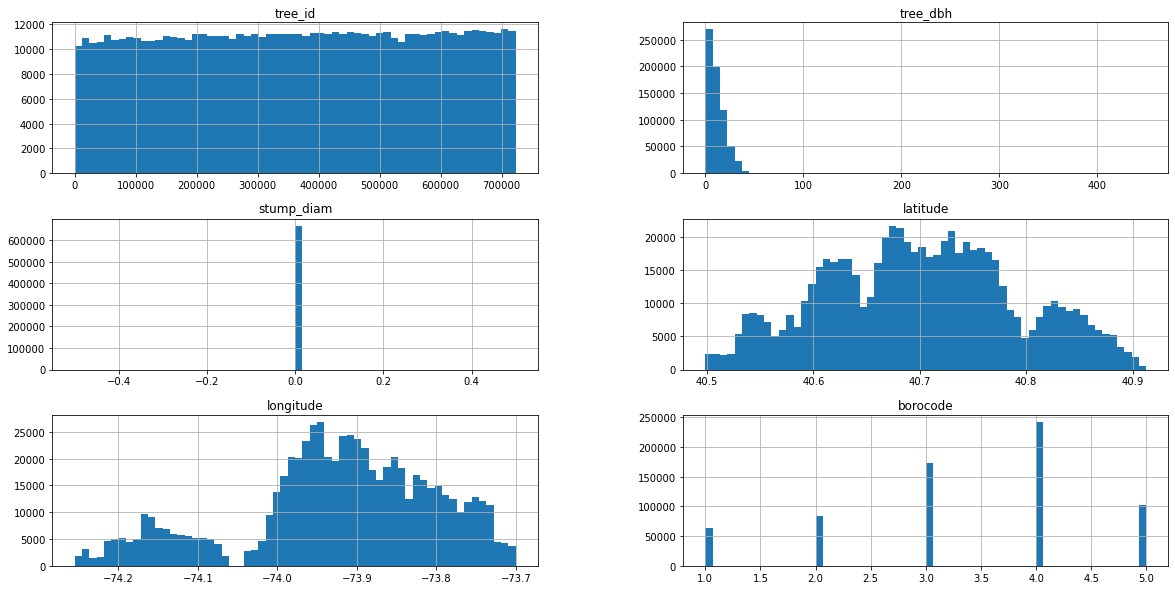

In [118]:
## Defnitely have some outliers for tree_dbh
notstump.hist(bins=60, figsize=(20, 10))

In [119]:
## trimming outliers for tree_dbh for alive and dead trees. Deleting values of 0 as well as those that exceed the a quantile of 0.995
tree_dbh_quant = notstump['tree_dbh'].quantile(0.995)
tree_dbh_quant



39.0

In [120]:
tree_dbh_trim = notstump[(notstump['tree_dbh'] > 0) & (notstump['tree_dbh'] < tree_dbh_quant)]

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'borocode'}>]], dtype=object)

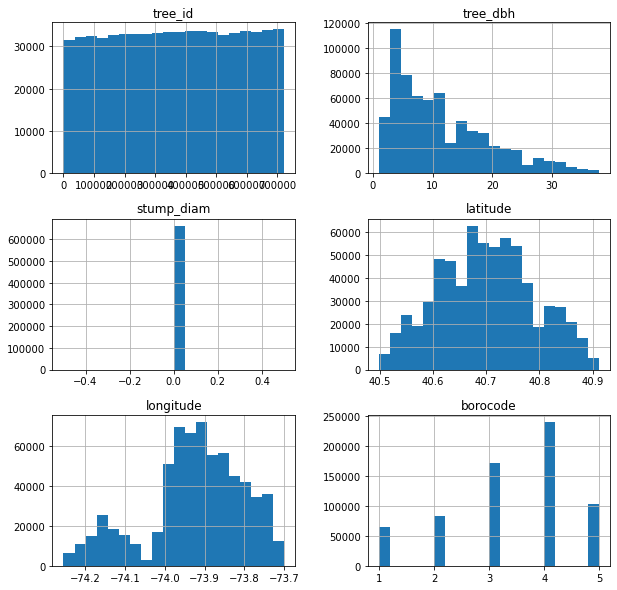

In [121]:
tree_dbh_trim.hist(bins=20, figsize=(10, 10))

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'borocode'}>]], dtype=object)

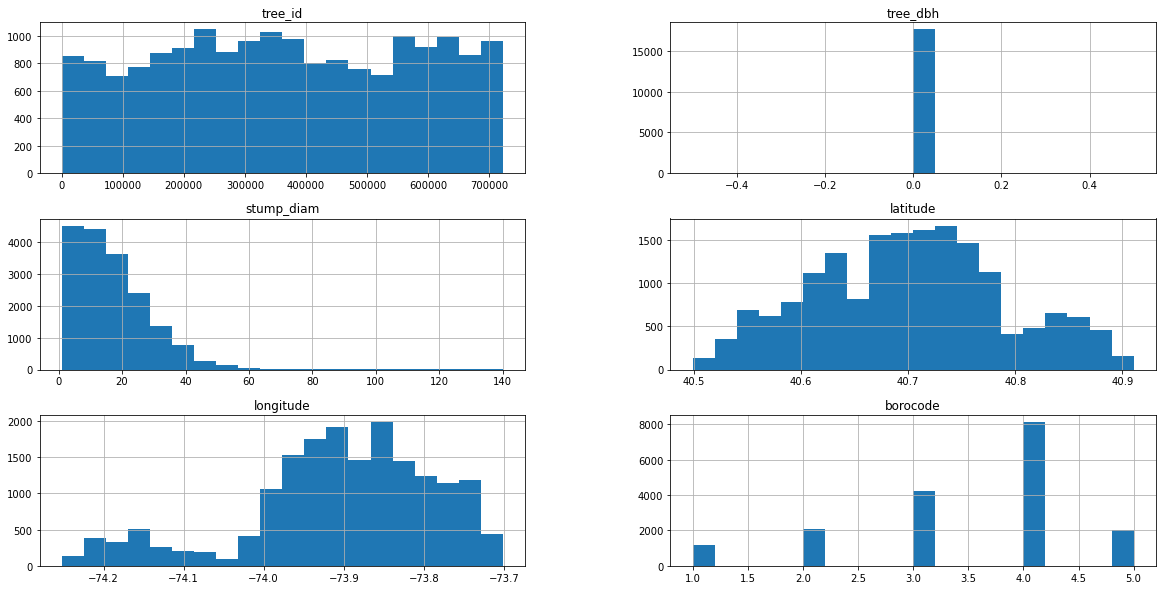

In [122]:
## Let's do the same for stumps
stump = trees_subset[(trees_subset['status'] == 'Stump')]
stump.hist(bins=20, figsize=(20, 10))

In [123]:
stump_quant = stump['stump_diam'].quantile(0.995)
stump_quant

61.0

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'borocode'}>]], dtype=object)

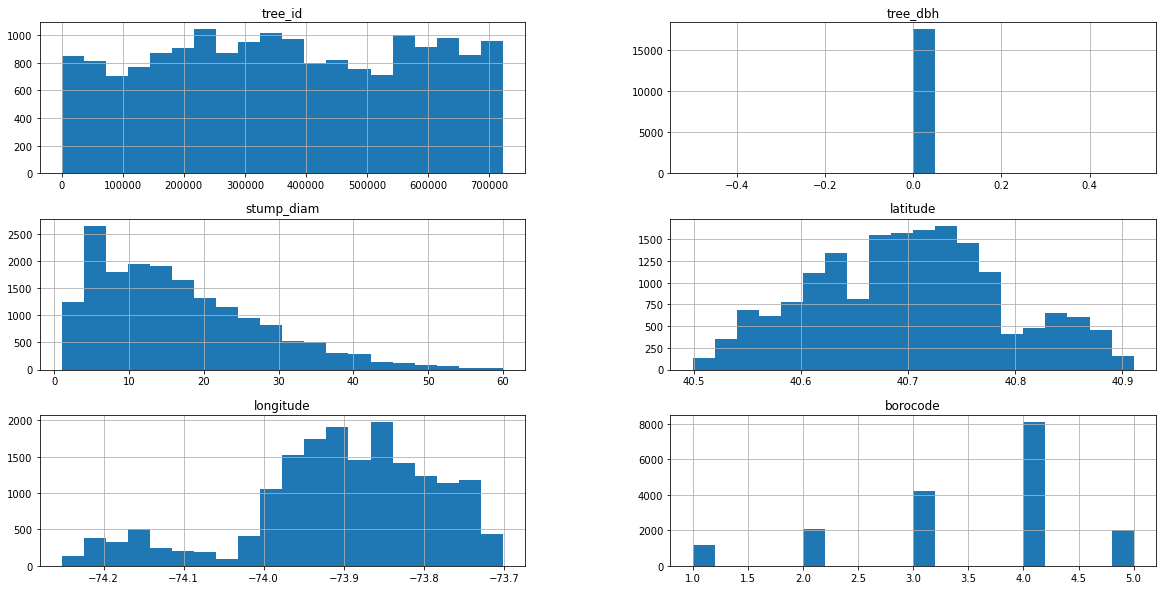

In [124]:
stump_trim = stump[(stump['stump_diam'] > 0) & (stump['stump_diam'] < stump_quant)]
stump_trim.hist(bins=20, figsize=(20,10))

In [125]:
trees_subset_trim = trees_subset.copy()

In [126]:
## Updating data set with trimmed values for both stumps and dead or alive trees
mask = (trees_subset['status'] == 'Stump') 
trees_subset_trim.loc[mask] = trees_subset.loc[mask][(trees_subset['stump_diam'] > 0) & (trees_subset['stump_diam'] < stump_quant)]

<ipython-input-126-88d1922cc7a5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trees_subset_trim.loc[mask] = trees_subset.loc[mask][(trees_subset['stump_diam'] > 0) & (trees_subset['stump_diam'] < stump_quant)]


array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'borocode'}>]], dtype=object)

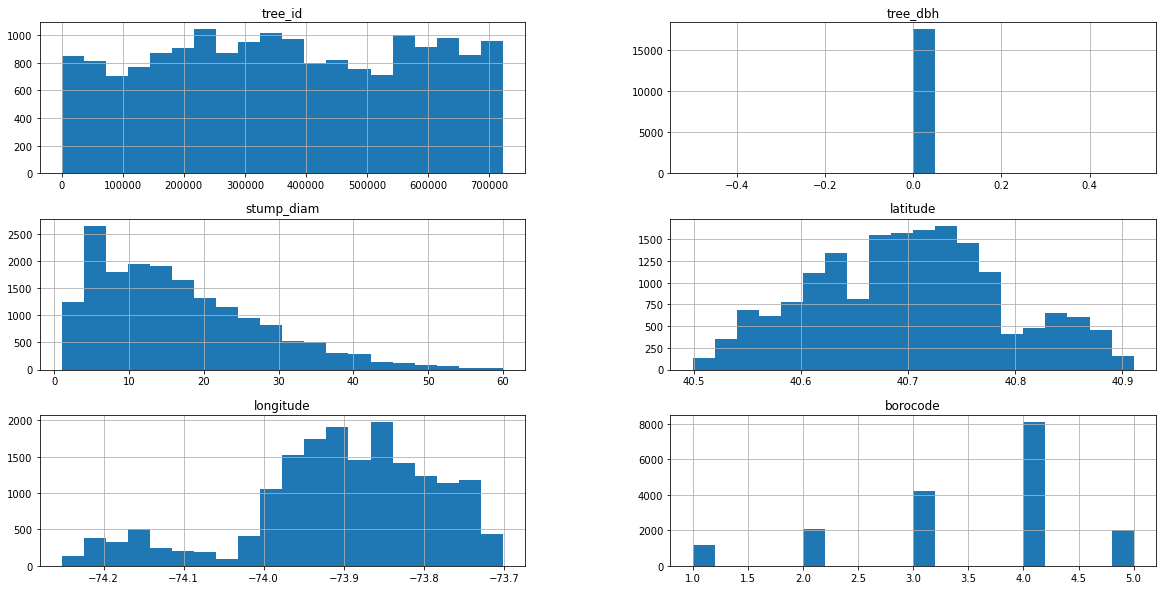

In [127]:
##stump_diam histograms match
trees_subset_trim[(trees_subset_trim['status'] == 'Stump')].hist(bins=20, figsize=(20, 10))


In [128]:
mask = ((trees_subset['status'] == 'Alive') | (trees_subset['status'] == 'Dead'))
trees_subset_trim.loc[mask] = trees_subset.loc[mask][(trees_subset['tree_dbh'] > 0) & (trees_subset['tree_dbh'] < tree_dbh_quant)]

<ipython-input-128-49d402440905>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trees_subset_trim.loc[mask] = trees_subset.loc[mask][(trees_subset['tree_dbh'] > 0) & (trees_subset['tree_dbh'] < tree_dbh_quant)]


array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'borocode'}>]], dtype=object)

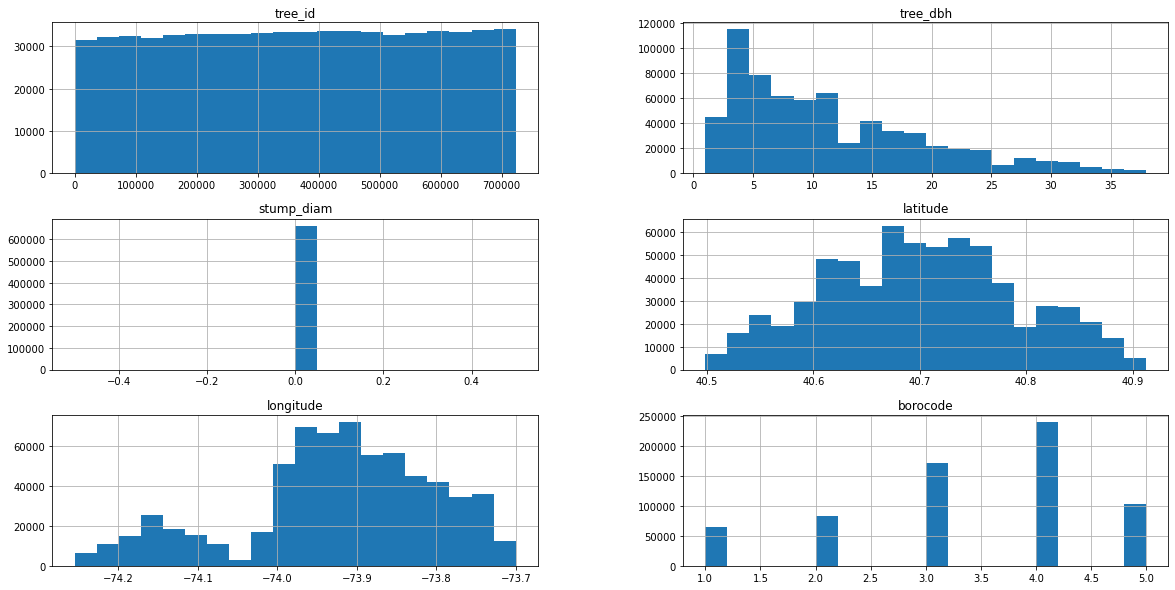

In [129]:
##tree_dbh histograms match
trees_subset_trim[(trees_subset_trim['status'] != 'Stump')].hist(bins=20, figsize=(20, 10))

In [130]:
## If we look at the shape of the graph, we see that we still have the same number of rows as our original trees_subset df. 
trees_subset_trim.shape, trees_subset.shape

((683788, 23), (683788, 23))

In [131]:
##This is because we only replaced values that did not meet our conditions with nulls.
trees_subset_trim.isnull().sum()

tree_id       4390
tree_dbh      4390
stump_diam    4390
curb_loc      4390
status        4390
health        4390
spc_latin     4390
steward       4390
sidewalk      4390
problems      4390
root_stone    4390
root_grate    4390
root_other    4390
trunk_wire    4390
trnk_light    4390
trnk_other    4390
brch_light    4390
brch_shoe     4390
brch_other    4390
latitude      4390
longitude     4390
borough       4390
borocode      4390
dtype: int64

In [132]:
## The number of nulls is equal to the number of values that were trimmed from both the stump and notstump conditions
(notstump.shape[0]-tree_dbh_trim.shape[0]) + (stump.shape[0]-stump_trim.shape[0])

4390

In [133]:
## Checking for NA values for alive trees
trees_cleaned[(trees_cleaned['status'] == 'Alive') & (trees_cleaned['spc_latin'] == 'NA')]


,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,borough,borocode


In [134]:
## Checking for non NA values for stumps/deads
trees_cleaned[(trees_cleaned['status'] != 'Alive') & (trees_cleaned['spc_latin'] != 'NA')]



,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,borough,borocode
263544,473703.0,12.0,0.0,OffsetFromCurb,Dead,NA,Gleditsia triacanthos var. inermis,NA,NA,NA,No,No,No,No,No,No,No,No,No,40.710384,-73.988208,Manhattan,1.0


In [135]:
## Replacing spc_latin value of above with NA
mask = (trees_cleaned['status'] != 'Alive') & (trees_cleaned['spc_latin'] != 'NA')
trees_cleaned.loc[mask, 'spc_latin'] = 'NA'
trees_cleaned[(trees_cleaned['status'] != 'Alive') & (trees_cleaned['spc_latin'] != 'NA')]



,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,borough,borocode


In [136]:
##Final data set
trees_cleaned = trees_subset_trim.dropna(0)


In [137]:
trees_cleaned.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
latitude      0
longitude     0
borough       0
borocode      0
dtype: int64

In [138]:
trees_cleaned.describe()

,tree_id,tree_dbh,stump_diam,latitude,longitude,borocode
count,679398.000000,679398.000000,679398.000000,679398.000000,679398.000000,679398.000000
mean,364834.978591,11.082739,0.424517,40.701272,-73.924246,3.355965
std,208072.053302,8.162720,3.163586,0.090375,0.123544,1.167822
min,3.000000,0.000000,0.000000,40.498466,-74.254965,1.000000
25%,186162.250000,4.000000,0.000000,40.631895,-73.980551,3.000000
50%,365760.500000,9.000000,0.000000,40.700620,-73.913121,4.000000
75%,545517.750000,16.000000,0.000000,40.762272,-73.835527,4.000000
max,722694.000000,38.000000,60.000000,40.912918,-73.700488,5.000000


In [139]:
alive_trees = trees_subset[trees_subset['status'] == 'Alive']
alive_trees.describe()

,tree_id,tree_dbh,stump_diam,latitude,longitude,borocode
count,652173.000000,652173.000000,652173.0,652173.000000,652173.000000,652173.000000
mean,365689.637480,11.709485,0.0,40.700991,-73.924587,3.360979
std,208194.926983,8.634239,0.0,0.090268,0.123844,1.167572
min,3.000000,0.000000,0.0,40.498466,-74.254965,1.000000
25%,186886.000000,5.000000,0.0,40.631725,-73.980973,3.000000
50%,367204.000000,10.000000,0.0,40.700287,-73.913449,4.000000
75%,546632.000000,16.000000,0.0,40.761999,-73.835219,4.000000
max,722694.000000,425.000000,0.0,40.912918,-73.700488,5.000000


In [140]:
## Alternatively, if we do not want to drop the outliers, we can replace them with median for either the tree_dbh or stump_dbh. 
## For the alive trees we will find medians for each specie of tree to be more precise.
alive_trees = trees_subset[trees_subset['status'] == 'Alive']
median_alive = alive_trees.groupby('spc_latin')['tree_dbh'].median()

## Appending median value to table
alive_merge = alive_trees.merge(median_alive, on='spc_latin', how='left')
alive_trees = alive_merge.rename(columns={'tree_dbh_y': 'median', 'tree_dbh_x': 'tree_dbh'})
alive_trees


,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,latitude,longitude,borough,borocode,median
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,40.723092,-73.844215,Queens,4,10.0
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,40.794111,-73.818679,Queens,4,17.0
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,40.717581,-73.936608,Brooklyn,3,10.0
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,40.713537,-73.934456,Brooklyn,3,10.0
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,40.666778,-73.975979,Brooklyn,3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652168,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No,40.713211,-73.954944,Brooklyn,3,17.0
652169,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,40.715194,-73.856650,Queens,4,3.0
652170,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No,40.620762,-74.136517,Staten Island,5,10.0
652171,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,40.850828,-73.903115,Bronx,2,10.0


In [141]:
## Replacing outliers and values of 0 with median 
alive_trees_trim = alive_trees.copy()
mask = alive_trees_trim['tree_dbh'] < 1
alive_trees_trim.loc[mask, 'tree_dbh'] = alive_trees_trim['median']
mask = alive_trees_trim['tree_dbh'] > alive_trees_trim['tree_dbh'].quantile(.995)
alive_trees_trim.loc[mask, 'tree_dbh'] = alive_trees_trim['median']


In [142]:
## If we go this route then we would have to drop the outliers for stumps and dead trees as we did in the first method.
##  The advantage of the first method is that it is faster, whereas the second will give more precise data, especially if we're looking at details regarding the species of tree 

In [143]:
trees_cleaned[trees_cleaned['status'] == 'Alive'].groupby('spc_latin')['tree_dbh'].describe()

,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7050.0,11.615603,6.377097,1.0,7.0,11.0,15.0,38.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2548.0,7.106750,4.291634,1.0,4.0,6.0,9.0,35.0
Acer ginnala,2047.0,7.857352,4.800331,1.0,4.0,7.0,10.0,38.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0
...,...,...,...,...,...,...,...,...
Tsuga canadensis,87.0,5.252874,3.942076,1.0,2.0,4.0,7.0,21.0
Ulmus americana,7847.0,11.465146,8.611434,1.0,4.0,9.0,17.0,38.0
Ulmus parvifolia,5339.0,7.369919,5.573992,1.0,3.0,5.0,10.0,38.0


In [144]:
alive_trees_trim.groupby('spc_latin')['tree_dbh'].describe()

,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7080.0,11.628814,6.396872,1.0,7.0,11.00,15.0,39.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.00,10.0,28.0
Acer campestre,2550.0,7.105882,4.290062,1.0,4.0,6.00,9.0,35.0
Acer ginnala,2049.0,7.856515,4.798062,1.0,4.0,7.00,10.0,38.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.00,3.0,30.0
...,...,...,...,...,...,...,...,...
Tsuga canadensis,88.0,5.232955,3.923807,1.0,2.0,3.75,7.0,21.0
Ulmus americana,7975.0,11.538433,8.711379,1.0,4.0,9.00,17.0,39.0
Ulmus parvifolia,5345.0,7.373620,5.588109,1.0,3.0,5.00,10.0,39.0


In [145]:
## When comparing the two tables, the differences are not very large so we will stick with the first outlier method for our visulization
trees_cleaned.to_csv(r'C:\Users\Neil MacLellan\Desktop\Data Analysis\Trees\TreesCleaned.csv', index = False)